	Out‑of‑Order	[height=0.5,
    ^
Expected rbrace, found '‑'  (at char 15151), (line:321, col:5)


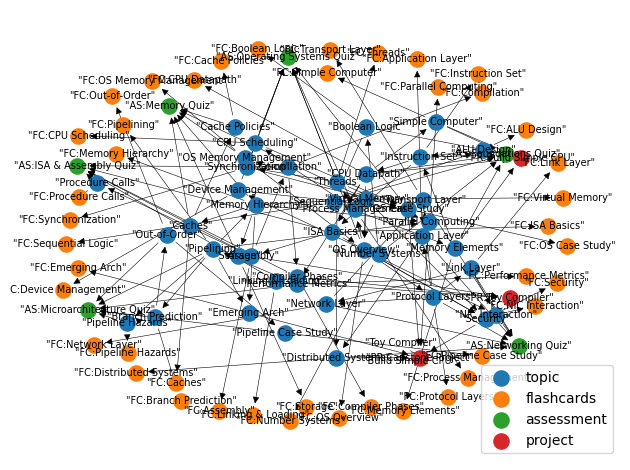

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

# If you don’t have graphviz, replace with nx.spring_layout

G = nx.read_graphml("computer_arch_curriculum.graphml")

quoted = nx.relabel_nodes(G, {n: f'"{n}"' for n in G.nodes()}, copy=True)
try:
    pos = graphviz_layout(quoted, prog="dot")
except Exception:
    pos = nx.spring_layout(quoted)
type_colors = {
    "topic": "#1f77b4",
    "flashcards": "#ff7f0e",
    "assessment": "#2ca02c",
    "project": "#d62728",
}
for t, c in type_colors.items():
    nx.draw_networkx_nodes(
        quoted,
        pos,
        nodelist=[n for n, d in quoted.nodes(data=True) if d.get("type") == t],
        node_color=c,
        node_size=120,
        label=t,
    )
nx.draw_networkx_edges(quoted, pos, arrows=True, arrowstyle="-|>", width=0.4)
nx.draw_networkx_labels(quoted, pos, font_size=7)
plt.legend(scatterpoints=1)
plt.axis("off")
plt.tight_layout()
plt.show()